# Mental Health Disorder Analysis

source: <a href='https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder'>Kaggle: Global Trends in Mental Health Disorder</a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv("dataset/Mental health Depression disorder Data.csv", nrows=6468)
df = pd.DataFrame(csv)

In [3]:
df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [4]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df, how='left', left_on='BRK_A3', right_on='Code')

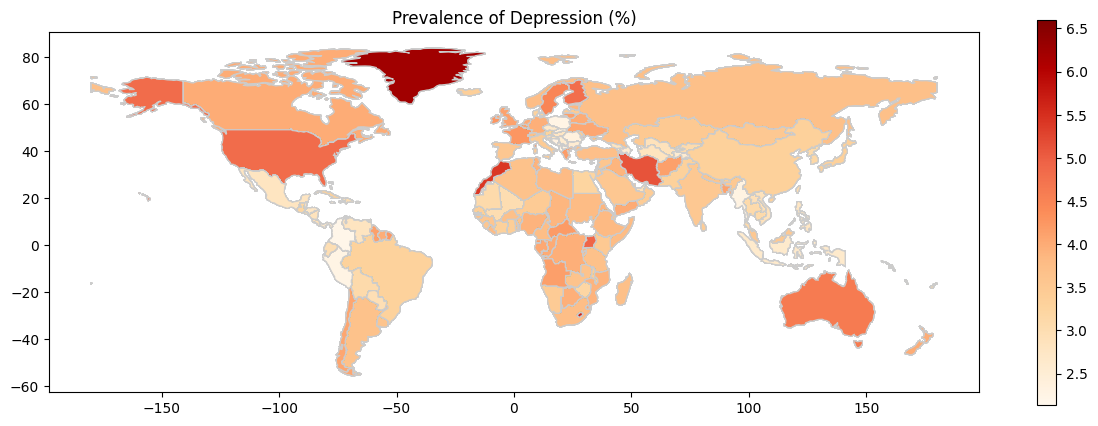

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Depression (%)', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Prevalence of Depression (%)')
plt.show()
